# Libraries

In [27]:
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio import pairwise2
import matplotlib.pyplot as plt, numpy as np

# Data

In [2]:
SeqA = Seq('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
SeqB = Seq('TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC')

# Quiz

### 1. Determine score of best local alingnment

In [4]:
local_alingment = pairwise2.align.localxx(SeqA, SeqB)
for l in local_alingment:
    print(format_alignment(*l))

1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  |||| |||||||  ||| | |||||||||||
5 AAGC-TAGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  ||||| ||||||  ||| | |||||||||||
5 AAGCT-AGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  |||| |||||||.||| | |||||||||||
5 AAGC-TAGCTAGTGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  ||||| ||||||.||| | |||||||||||
5 AAGCT-AGCTAGTGCA-T-AGCTAGCTAGC
  Score=26



In [7]:
local_alignments = pairwise2.align.localxx(SeqB, SeqA, score_only = True)
print(local_alignments)

26.0


### 2. Determine the similarity of DNA sequence A and sequence B using Hamming distance.

In [11]:
def hammin(SeqA, SeqB):
    h = 0
    for x,y in zip(SeqA, SeqB):
        if x!=y:
            h += 1
    return h
print(f"The similarity of Sequence A and Sequence B by Hamming distance: {hammin(SeqA, SeqB)}")

The similarity of Sequence A and Sequence B by Hamming distance: 30


### 4. Calculate the similarity of DNA Sequence A and Sequence B using Levenshtein Distance

In [12]:
from Levenshtein import distance
print(f"The similarity of Sequence A and Sequence B by Levenshtein Distance: {distance(SeqA, SeqB)}")

The similarity of Sequence A and Sequence B by Levenshtein Distance: 9


### 5. Map DNA Sequence A and Sequence B Similarity using dot plt technique

In [24]:
def dot_plus(SeqA, SeqB):
    print(' |' + SeqB)
    print('-' * (len(SeqB) + 2))
    for x in SeqA:
        print(x+'|', end = '')
        for y in SeqB:
            if x == y:
                print('X', end = '')
            else:
                print(' ', end = '')
        print('')
dot_plus(SeqA, SeqB)

 |TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC
---------------------------------
A|    XX   X   X    X X   X   X  
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
C| X     X   X     X    X   X   X
T|X X     X   X  X   X   X   X   
T|X X     X   X  X   X   X   X   
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
C| X     X   X     X    X   X   X
T|X X     X   X  X   X   X   X   
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
C| X     X   X     X    X   X   X
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
T|X X     X   X  X   X   X   X   
C| X     X   X     X    X   X   X
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
C| X     X   X     X    X   X   X
T|X X     X   X  X   X   X   X   
A|    XX   X   X    X X   X   X  
G|   X  X   X   X X    X   X   X 
C| X     X   X     X    X   X   X
T|X X     X   X  X   X   X   X   
A|    XX   X  

In [25]:
def pair(a,b):
    return True if a == b else False

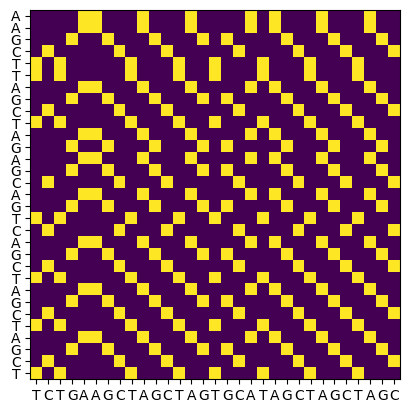

In [37]:
def create_matrix(SeqA, SeqB):
    matrix = []
    for x in SeqA:
        row = []
        for y in SeqB:
            row.append(pair(x, y))
        matrix.append(row)
    return matrix

plt.imshow(np.array(create_matrix(SeqA, SeqB)))
plt.xticks(np.arange(len(SeqB)), SeqB)
plt.yticks(np.arange(len(SeqA)), SeqA)
plt.show()